In [6]:
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.utils import ImageReader
import os
import mne
import json

from utils import *
import matplotlib
from et_qc import *
from eda_qc import *
from ecg_qc import *
from lsl_problem import *

In [7]:
subject = 'P5548165'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'

Effective sampling rate: 119.9959
Flag: all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter): True
Flag: % of NaNs is the same between coordinate systems (UCS and TBCS (gaze origin) and between UCS and display area (gaze point)): True
Mean difference in percent valid data between right and left eyes: 3.2147%
Percent of data with gaze point differences of over 0.2 mm: 0.0991%


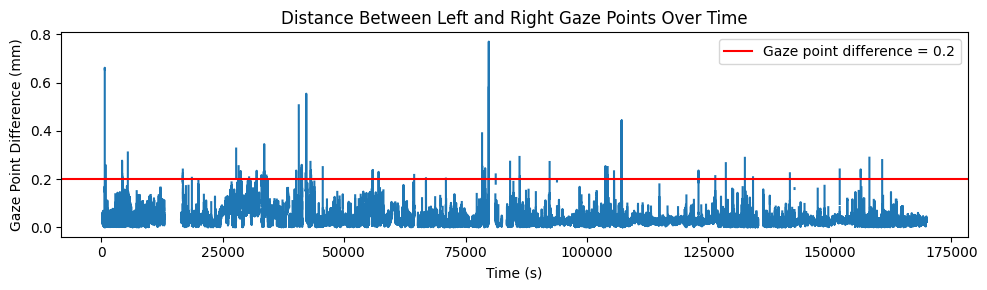

In [10]:
et_vars, et_df = et_qc(xdf_filename = xdf_filename, stim_df = stim_df, task='Experiment')

In [35]:
np.mean(et_df.left_pupil_validity)

np.float32(0.8352222)

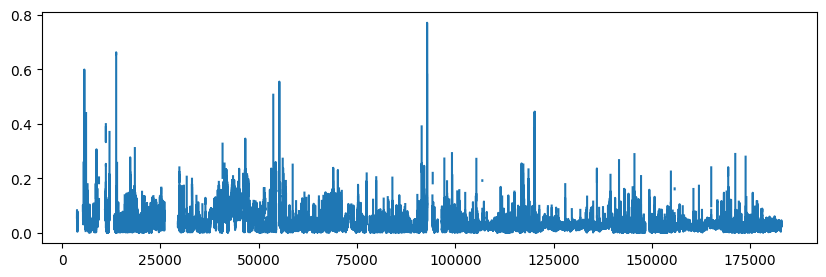

In [20]:
x1 = et_df.right_gaze_point_on_display_area_0
x2 = et_df.left_gaze_point_on_display_area_0
y1 = et_df.right_gaze_point_on_display_area_1
y2 = et_df.left_gaze_point_on_display_area_1
all_dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# plt with x = index 
plt.figure(figsize=(10, 3))
plt.plot(all_dists)

In [36]:
get_event_data(event = "RestingState", df = et_df, stim_df = stim_df)


,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter,lsl_time_stamp,time,diff
0,9.566562e+11,1.0,1.0,4.405524,-111.019165,735.597778,61.549683,-109.272552,732.750122,0.489389,...,0.448207,0.691243,0.446429,1.0,1.0,4.509247,4.642517,690748.387381,130.546076,0.008334
1,9.566562e+11,1.0,1.0,4.408916,-111.008789,735.613037,61.551483,-109.260887,732.720947,0.489383,...,0.457457,0.697706,0.437141,1.0,1.0,4.516434,4.643204,690748.395714,130.554410,0.008334
2,9.566562e+11,1.0,1.0,4.411083,-111.013176,735.598206,61.556595,-109.269203,732.748779,0.489379,...,0.460577,0.698299,0.440356,1.0,1.0,4.528885,4.636017,690748.404048,130.562744,0.008334
3,9.566562e+11,1.0,1.0,4.416933,-111.020081,735.628296,61.561199,-109.276588,732.762024,0.489368,...,0.452286,0.701809,0.431194,1.0,1.0,4.535110,4.641663,690748.412382,130.571077,0.008334
4,9.566562e+11,1.0,1.0,4.422386,-111.032257,735.597656,61.561455,-109.287781,732.730774,0.489358,...,0.456607,0.688949,0.452755,1.0,1.0,4.532745,4.673599,690748.420715,130.579411,0.008334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35994,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.347513,430.506209,0.008334
35995,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.355847,430.514542,0.008334
35996,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.364180,430.522876,0.008334
35997,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.372514,430.531210,0.008334


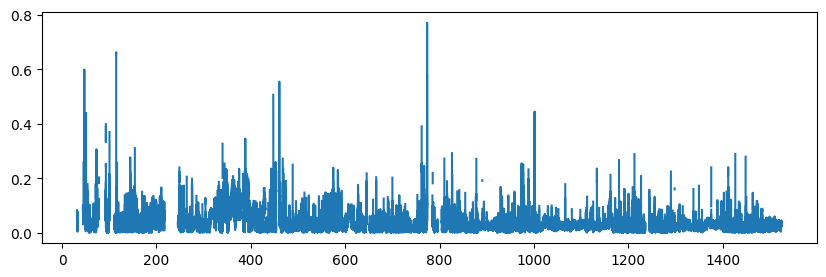

In [25]:
plt.figure(figsize=(10, 3))

plt.plot(et_df.time, all_dists)

In [28]:
et_df[["lsl_time_stamp", "time"]]

,lsl_time_stamp,time
0,690617.841304,0.000000
1,690617.849638,0.008334
2,690617.857972,0.016667
3,690617.866305,0.025001
4,690617.874639,0.033334
...,...,...
187763,693322.612947,2704.771642
187764,693322.621280,2704.779976
187765,693322.629614,2704.788310
187766,693322.637947,2704.796643


In [18]:
mic_df = get_event_data(event = 'RestingState', df = whole_mic_df, stim_df = stim_df)

In [19]:
mic_df

,int_array,bytestring,duration,lsl_time_stamp,time


In [20]:
stim_df

,trigger,event,lsl_time_stamp,time
0,200,Onset_Experiment,652877.853621,0.000000
1,1729108775,psychopy_time_stamp,652877.853632,0.000011
2,10,Onset_RestingState,652903.462754,25.609133
3,1729108800,psychopy_time_stamp,652903.462766,25.609144
4,11,Offset_RestingState,653203.463529,325.609908
...,...,...,...,...
256,1729111346,psychopy_time_stamp,655451.996951,2574.143330
257,201,Offset_Experiment,655456.997079,2579.143458
258,1729111351,psychopy_time_stamp,655456.997089,2579.143468
259,4,Bx_input,655456.997128,2579.143507


In [21]:
whole_mic_df

,int_array,bytestring,duration,lsl_time_stamp,time
0,32,b' \x00\x00\x00\x00\x00\x00\x00',0.000000e+00,653249.825089,0.000000
1,37,b'%\x00\x00\x00\x00\x00\x00\x00',5.142097e-10,653249.825112,0.000023
2,37,b'%\x00\x00\x00\x00\x00\x00\x00',1.028419e-09,653249.825135,0.000045
3,43,b'+\x00\x00\x00\x00\x00\x00\x00',1.542629e-09,653249.825158,0.000068
4,39,"b""'\x00\x00\x00\x00\x00\x00\x00""",2.056839e-09,653249.825180,0.000091
...,...,...,...,...,...
100124636,11,b'\x0b\x00\x00\x00\x00\x00\x00\x00',5.148506e-02,655520.270591,2270.445501
100124637,11,b'\x0b\x00\x00\x00\x00\x00\x00\x00',5.148506e-02,655520.270613,2270.445524
100124638,12,b'\x0c\x00\x00\x00\x00\x00\x00\x00',5.148506e-02,655520.270636,2270.445546
100124639,7,b'\x07\x00\x00\x00\x00\x00\x00\x00',5.148506e-02,655520.270659,2270.445569


In [22]:
vars = {}

In [24]:
vars['sampling_rate'], vars['lsl_wav_duration_diff'], vars['num_NaN'], vars['percent_NaN'], vars['quan25'], vars['quan75'], vars['std'], vars['min'], vars['max'] = [0,0,0,0,0,0,0,0,0]


In [28]:
vars['quan75']

np.float64(0.0)

In [27]:
vars['sampling_rate'], vars['lsl_wav_duration_diff'], vars['num_NaN'], vars['percent_NaN'], vars['quan25'], vars['quan75'], vars['std'], vars['min'], vars['max'] = np.zeros(9)


In [ ]:
'string'.upper()

TypeError: str.upper() takes no arguments (1 given)